In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sb
pd.set_option('display.max_rows',10)

Populating the interactive namespace from numpy and matplotlib


## Import the final training dataset

In [4]:
TrainingData = pd.read_csv('TrainingData.csv')
pd.options.display.max_columns = None
TrainingData.head()

,contract_id,Churning,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,subscribed_power,Contract_length_(days),AVG_price_energy,AVG_price_power,code_elect_campaign_first_subs_kamkkxfxxuwbdslkwifmmcsiusiuosws,code_elect_campaign_first_subs_ldkssxwpmemidmecebumciepifcamkci,code_elect_campaign_first_subs_lxidpiddsbxsbosboudacockeimpuepw,code_elect_campaign_first_subs_usapbepcfoloekilkwsdiboslwaxobdp
0,6975aab29f35173b43eae4f595b747c7,0.0,12067.0,8723.0,303.0,395.464648,368.851331,0.000000,92.644973,0.144509,0.050364,27.257522,1.0,27.027749,30.223492,27.328471,3.0,37.220019,6.0,21.595285,2557.0,1.133890,269.484186,1,0,0,0
1,8073016b742f47cf4c76cc41dc410122,1.0,3183.0,0.0,406.0,228.789150,494.224444,0.000000,0.000000,0.181625,0.000000,31.082797,0.0,54.699675,38.276871,34.610440,1.0,17.946074,4.0,15.648757,1827.0,0.539915,159.867773,0,0,1,0
2,227c0e6b15256a1d3d3460e15c24ba60,0.0,18464.0,26847.0,1534.0,1096.439754,1863.335174,15.460479,90.524018,0.204192,0.069878,27.592143,1.0,190.565716,73.755271,66.690466,3.0,57.147990,6.0,21.595285,2327.0,1.387977,271.930898,1,0,0,0
3,e1ea0597bbad7bfd95adf1c7103bfda1,0.0,17743.0,0.0,0.0,1270.888652,0.000000,0.000000,12.691187,0.181764,0.000000,29.744311,0.0,0.000000,42.023714,37.998383,1.0,105.174300,4.0,16.462493,1461.0,0.536597,160.188472,0,0,1,0
4,a2e017f297f2557a7b1cf4a92bc993e9,0.0,42537.0,7606.0,3873.0,2006.504608,4703.308727,0.000000,90.275306,0.142310,0.049471,27.257522,1.0,344.787353,24.346702,22.014602,2.0,185.465888,4.0,31.418949,1531.0,1.109814,269.484186,0,0,1,0


In [5]:
TrainingData.shape

(15867, 27)

In [6]:
TrainingData.dtypes

contract_id                                                         object
Churning                                                           float64
elect_cons_at_12m                                                  float64
gas_cons_at_12m                                                    float64
elect_cons_last_month                                              float64
                                                                    ...   
AVG_price_power                                                    float64
code_elect_campaign_first_subs_kamkkxfxxuwbdslkwifmmcsiusiuosws      int64
code_elect_campaign_first_subs_ldkssxwpmemidmecebumciepifcamkci      int64
code_elect_campaign_first_subs_lxidpiddsbxsbosboudacockeimpuepw      int64
code_elect_campaign_first_subs_usapbepcfoloekilkwsdiboslwaxobdp      int64
Length: 27, dtype: object

### Feature Scaling

In [7]:
#Perform Feature Scaling and One Hot Encoding
from sklearn.preprocessing import MinMaxScaler

#Perform Feature Scaling on some of the columns in order to bring them on same scale
Scaler = MinMaxScaler()
columns_for_ft_scaling = ['elect_cons_at_12m', 'gas_cons_at_12m', 'elect_cons_last_month','fcst_consumption_elect_12m',
                         'fcst_consumption_elect_cal_year','fcst_current_discount','fcst_bill_meter_rent_12m','fcst_price_period_1','fcst_price_period_2',
                         'fcst_price_power_period_1','current_paid_consumption','gross_margin_power_elect','net_margin_power_elect',
                         'number_active_products','total_net_margin','customer_antiquity_in_years','subscribed_power',
                         'Contract_length_(days)','AVG_price_energy','AVG_price_power']

#Apply the feature scaling operation on dataset using fit_transform() method
TrainingData[columns_for_ft_scaling] = Scaler.fit_transform(TrainingData[columns_for_ft_scaling])

In [8]:
TrainingData.head(3)

,contract_id,Churning,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,subscribed_power,Contract_length_(days),AVG_price_energy,AVG_price_power,code_elect_campaign_first_subs_kamkkxfxxuwbdslkwifmmcsiusiuosws,code_elect_campaign_first_subs_ldkssxwpmemidmecebumciepifcamkci,code_elect_campaign_first_subs_lxidpiddsbxsbosboudacockeimpuepw,code_elect_campaign_first_subs_usapbepcfoloekilkwsdiboslwaxobdp
0,6975aab29f35173b43eae4f595b747c7,0.0,0.008356,0.004834,0.019825,0.144312,0.329626,0.0,0.142038,0.418319,0.501401,0.683750,1.0,0.376946,0.605412,0.641321,0.064516,0.147081,0.333333,0.032565,0.394245,0.690982,0.771816,1,0,0,0
1,8073016b742f47cf4c76cc41dc410122,1.0,0.007889,0.000730,0.019854,0.141866,0.330155,0.0,0.091522,0.525761,0.000000,0.779419,0.0,0.378605,0.611167,0.646552,0.000000,0.145726,0.200000,0.023046,0.262950,0.329020,0.457869,0,0,1,0
2,227c0e6b15256a1d3d3460e15c24ba60,0.0,0.008692,0.013361,0.020180,0.154595,0.335928,0.6,0.140881,0.591087,0.695681,0.692119,1.0,0.386750,0.636517,0.669595,0.064516,0.148481,0.333333,0.032565,0.352878,0.845821,0.778824,1,0,0,0


In [9]:
#Check ratio between Churn and No_Churn
print('Number of customers who churned', len(TrainingData[(TrainingData['Churning']==1)]))
print('Number of customers who did not churn', len(TrainingData[(TrainingData['Churning']==0)]))

Number of customers who churned 1544
Number of customers who did not churn 14323


In [10]:
TrainingData.shape

(15867, 27)

In [11]:
#DownSample = TrainingData[TrainingData['Churning']==0].sample(n=2000)
#Churning = TrainingData[(TrainingData['Churning']==1)]

In [12]:
#TrainingDataBal = pd.concat([DownSample, Churning]).sample(frac=1)
#TrainingDataBal

### Preparing for models

In [13]:
#Create Feature variable X and Target variable y
X = TrainingData.drop(['Churning','contract_id'], axis = 1)
y = TrainingData['Churning']

In [14]:
#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

In [15]:
X_train.shape

(11106, 25)

In [16]:
y_test.shape

(4761,)

### Train different models

In [17]:
# Machine Learning classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [18]:
#Fit logistic Regression Model
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
log_pred = logmodel.predict(X_test)
log_proba = logmodel.predict_proba(X_test)[:,1]

# Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, log_pred) * 100, 2)
Log_ROC_auc = roc_auc_score(y_test, log_proba)
fpr_log, tpr_log, threshold_log = roc_curve(y_test,log_proba)

#Brier Score
Brier_log = pow((log_proba-y_test),2).sum()/len(y_test)

# Show confusion matrix
conf_mat_logmodel = confusion_matrix(y_test,log_pred)
conf_mat_logmodel

array([[4302,    0],
       [ 459,    0]], dtype=int64)

In [19]:
#Fit Support Vector Machine Model
svcmodel = SVC(kernel='linear', probability=True)
svcmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test)
svc_proba = svcmodel.predict_proba(X_test)[:,1]

# Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)
svc_ROC_auc = roc_auc_score(y_test, svc_proba)
fpr_svc, tpr_svc, threshold_svg = roc_curve(y_test,svc_proba)

#Brier Score
Brier_svc = pow((svc_proba-y_test),2).sum()/len(y_test)

# Show confusion matrix
conf_mat_svcmodel = confusion_matrix(y_test,svc_pred)
conf_mat_svcmodel

array([[4302,    0],
       [ 459,    0]], dtype=int64)

In [20]:
#Fit K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
knn_pred = knnmodel.predict(X_test)
knn_proba = knnmodel.predict_proba(X_test)[:,1]

# Find Accuracy using accuracy_score method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)
knn_ROC_auc = roc_auc_score(y_test, knn_proba)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test,knn_proba)

#Brier Score
Brier_knn = pow((knn_proba-y_test),2).sum()/len(y_test)

# Show confusion matrix
conf_mat_knnmodel = confusion_matrix(y_test,knn_pred)
conf_mat_knnmodel

array([[4250,   52],
       [ 431,   28]], dtype=int64)

In [21]:
#Fit Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini")
dtmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)
dt_proba = dtmodel.predict_proba(X_test)[:,1]

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)
dt_ROC_auc = roc_auc_score(y_test, dt_proba)
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test,dt_proba)

#Brier Score
Brier_dt = pow((dt_proba-y_test),2).sum()/len(y_test)

# Show confusion matrix
conf_mat_dtmodel = confusion_matrix(y_test,dt_pred)
conf_mat_dtmodel

array([[3880,  422],
       [ 359,  100]], dtype=int64)

In [22]:
#Fit Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 500, criterion = 'entropy')
rfmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)
rf_proba = rfmodel.predict_proba(X_test)[:,1]

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)
rf_ROC_auc = roc_auc_score(y_test, rf_proba)
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test,rf_proba)

#Brier Score
Brier_rf = pow((rf_proba-y_test),2).sum()/len(y_test)

# Show confusion matrix
conf_mat_rfmodel = confusion_matrix(y_test,rf_pred)
conf_mat_rfmodel

array([[4300,    2],
       [ 434,   25]], dtype=int64)

### Models Comparison

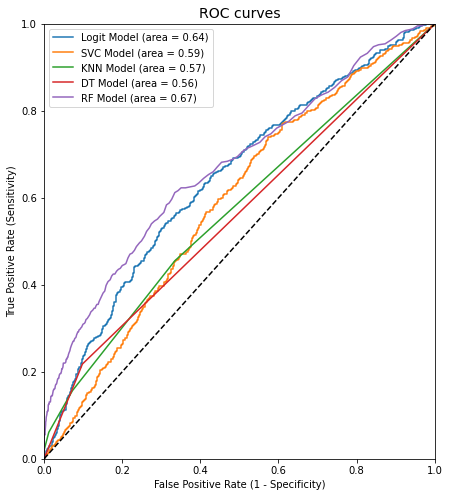

In [23]:
plt.figure(figsize=(7,8))
plt.plot(fpr_log,tpr_log,label='Logit Model (area = %0.2f)'%Log_ROC_auc)
plt.plot(fpr_svc,tpr_svc,label='SVC Model (area = %0.2f)'%svc_ROC_auc)
plt.plot(fpr_knn,tpr_knn,label='KNN Model (area = %0.2f)'%knn_ROC_auc)
plt.plot(fpr_dt,tpr_dt,label='DT Model (area = %0.2f)'%dt_ROC_auc)
plt.plot(fpr_rf,tpr_rf,label='RF Model (area = %0.2f)'%rf_ROC_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curves', fontsize=14)
plt.legend()

In [24]:
# Compare the models according to their AUC
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest'],
    'AUC Score': [round(Log_ROC_auc,2), round(svc_ROC_auc,2), round(knn_ROC_auc,2), 
              round(dt_ROC_auc,2), round(rf_ROC_auc,2)],
    'Brier Score': [round(Brier_log,3), round(Brier_svc,3), round(Brier_knn,3), 
              round(Brier_dt,3), round(Brier_rf,3)]})
Model_Comparison_df = Model_Comparison.sort_values(by='AUC Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('AUC Score')
Model_Comparison_df.reset_index()

,AUC Score,Model,Brier Score
0,0.67,Random Forest,0.081
1,0.64,Logistic Regression,0.085
2,0.59,Support Vector Machine,0.087
3,0.57,K-Nearest Neighbor,0.097
4,0.56,Decision Tree,0.164


In [25]:
'''# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest'],
    'Score': [logmodel_accuracy, svc_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()''';

## Using The Random Forest Model

In [26]:
print(rfmodel.predict(X_test.iloc[[1]]))
print(rfmodel.predict_proba(X_test.iloc[[1]]))

[0.]
[[0.918 0.082]]


In [27]:
# Array of the Churning probability (named also rf_proba)
rfmodel.predict_proba(X_test)[:,1]

array([0.202, 0.082, 0.084, ..., 0.286, 0.072, 0.21 ])

Text(0, 0.5, 'Frequency')

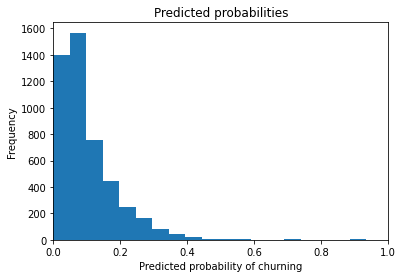

In [28]:
#Showing the data inbalance
plt.hist(rf_proba, bins=20)
plt.xlim(0,1)
plt.title('Predicted probabilities')
plt.xlabel('Predicted probability of churning')
plt.ylabel('Frequency')

In [29]:
#Function that takes a probability threshold and calculates Sensitivity and Specificity 
def find_threshold(threshold):
    print('Sensitivity: ', tpr_rf[threshold_rf > threshold][-1])
    print('Specificity: ', 1- fpr_rf[threshold_rf > threshold][-1])

In [32]:
find_threshold(0.08)

Sensitivity:  0.681917211328976
Specificity:  0.5455602045560204


In [49]:
#Assign the new prediction values based on the new threshold
from sklearn.preprocessing import binarize
rf_pred_class = binarize(rf_proba.reshape(-1,1), 0.08)
rf_pred_class = rf_pred_class.flatten()
rf_pred_class

array([1., 1., 1., ..., 1., 0., 1.])

In [35]:
rf_proba

array([0.202, 0.082, 0.084, ..., 0.286, 0.072, 0.21 ])

In [36]:
len(rf_pred_class)

4761

In [37]:
print('Predicted Churn',len(rf_pred_class[rf_pred_class==1]))
print('Predicted No_Churn',len(rf_pred_class[rf_pred_class==0]))

Predicted Churn 2268
Predicted No_Churn 2493


In [38]:
print('Actual Churn',len(y_test[y_test==1]))
print('Actual No_Churn',len(y_test[y_test==0]))
len(y_test)

Actual Churn 459
Actual No_Churn 4302


4761

In [39]:
# Show confusion matrix again
conf_mat_rfmodel = confusion_matrix(y_test,rf_pred_class)
conf_mat_rfmodel

array([[2347, 1955],
       [ 146,  313]], dtype=int64)

### Making the final output table

In [40]:
# Predict the probability of Churn of each customer
TrainingData['Probability_of_Churn'] = rfmodel.predict_proba(TrainingData[X_test.columns])[:,1]

In [50]:
# Calculate Churning prediction of each customer
TrainingData['Predicted_Churn'] = binarize(rfmodel.predict_proba(TrainingData[X_test.columns])[:,1].reshape(-1,1),0.08)

In [43]:
len(TrainingData[TrainingData['Predicted_Churn']==1])

4092

In [44]:
# Create a Dataframe showcasing actutual churning, predicted churning and churning probability given by the model
Churn_Probability = TrainingData[['contract_id','Churning','Predicted_Churn','Probability_of_Churn']]

In [45]:
#Take only the elements contained in the Test dataset
Churn_ProbabilityTest= Churn_Probability[Churn_Probability.index.isin(X_test.index)]

In [46]:
len(Churn_ProbabilityTest[Churn_ProbabilityTest['Predicted_Churn']==1])

2268

In [47]:
#Descending order of propensity to churn
Churn_ProbabilityTest.sort_values(by='Probability_of_Churn', ascending=False)

,contract_id,Churning,Predicted_Churn,Probability_of_Churn
9618,faf60d1008a80d7e557d762a3988860c,1.0,1.0,0.984
8621,9c48d7255877d234f7201b942999ac28,1.0,1.0,0.950
8657,dbdcb417fc2d324845d254695dd25b3d,1.0,1.0,0.930
4788,e12839ee323b1c82c15a1c729181d746,1.0,1.0,0.920
938,65cb91b93ad5b39b874e5defd8f96952,1.0,1.0,0.916
...,...,...,...,...
7242,63fb387cef7a1a73ed1b99f74e54c940,0.0,0.0,0.000
10072,d09137acfe2ba08fa9b7a561f21f31a0,0.0,0.0,0.000
10328,cd054e153c54aa6b480e15277f107db7,0.0,0.0,0.000
459,e0db64f578fee4a85ae8306359ce74ea,0.0,0.0,0.000
